In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("G:\ML\car_price_prediction_sysytem\car.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.isnull().sum().sum
df.info()
df.isnull().sum().sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


<bound method NDFrame._add_numeric_operations.<locals>.sum of name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64>

In [4]:
Backup = df.copy()

In [5]:
#df['kms_driven'].unique()
#df['fuel_type'].unique()

In [6]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
df['fuel_type'] = imputer.fit_transform(df[['fuel_type']])

In [7]:
df = df[df['year'].str.isnumeric()]

In [8]:
df['year'] = df['year'].astype(int)

In [9]:
#df['kms_driven'].unique()
imputer1 = SimpleImputer(missing_values='Petrol',strategy = 'most_frequent')
df['kms_driven'] = imputer.fit_transform(df[['kms_driven']])
df['kms_driven'] = imputer1.fit_transform(df[['kms_driven']])
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
df['kms_driven'] = df['kms_driven'].astype(int)

In [10]:
#df['Price'].unique()
imputer2 = SimpleImputer(missing_values='Ask For Price',strategy = 'most_frequent')
df['Price'] = imputer2.fit_transform(df[['Price']])

In [11]:
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    int32 
 4   kms_driven  842 non-null    int32 
 5   fuel_type   842 non-null    object
dtypes: int32(3), object(3)
memory usage: 36.2+ KB


In [13]:
df['name'] = df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [14]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,250000,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel


In [15]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [16]:
df.shape

(842, 6)

# Data cleaning and prepocessing is done now the clean data is stored in a seperate table

In [17]:
df = df.reset_index(drop = True)

In [18]:
df.to_csv('new_clean_car_data')

In [19]:
df = df[df['Price']<6000000]

In [20]:
import seaborn as sns

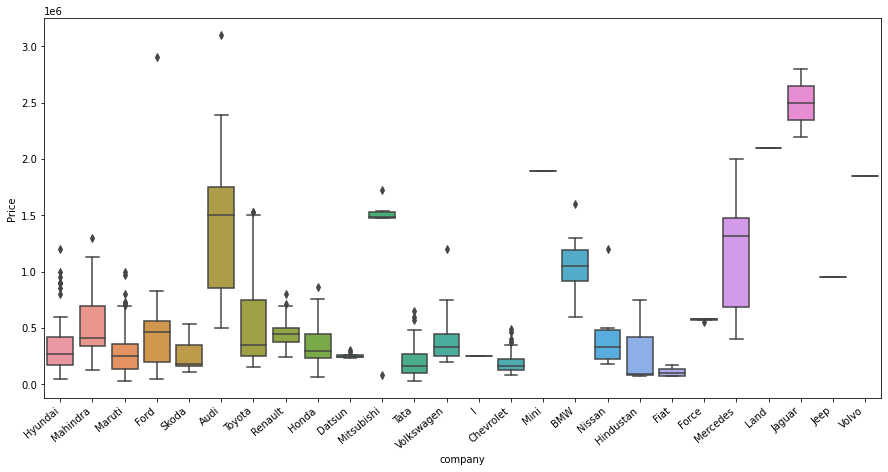

In [21]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points can

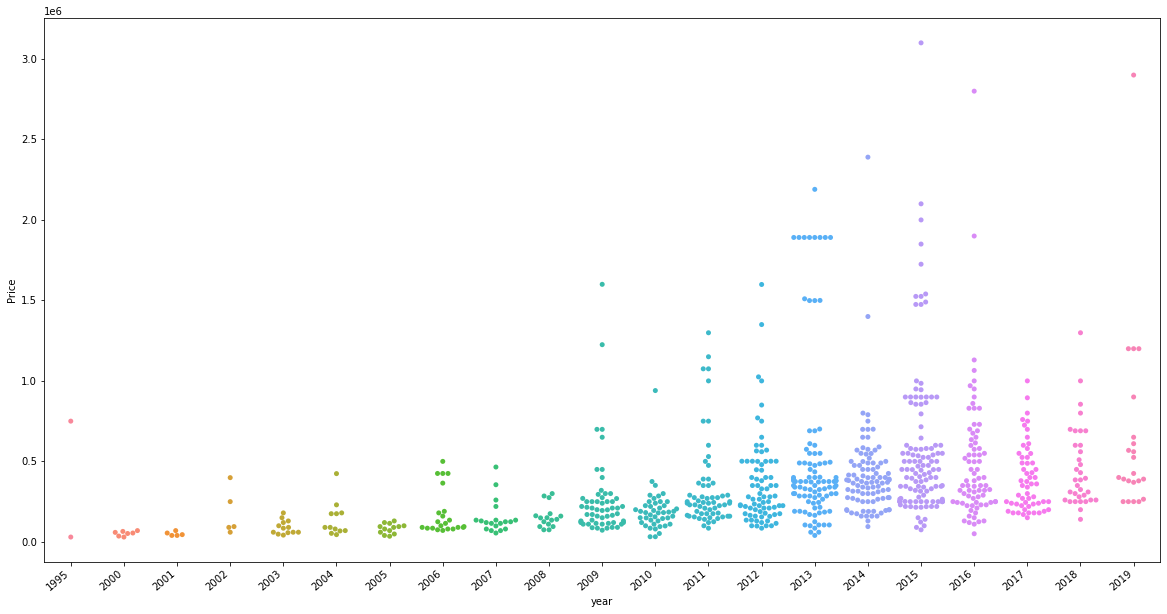

In [22]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [23]:
X=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,36000,Diesel
...,...,...,...,...,...
837,Toyota Corolla Altis,Toyota,2009,132000,Petrol
838,Tata Zest XM,Tata,2018,27000,Diesel
839,Mahindra Quanto C8,Mahindra,2013,40000,Diesel
840,Honda Amaze 1.2,Honda,2014,35000,Petrol


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [57]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                   remainder='passthrough')

In [58]:
#column_trans=make_column_transformer((OneHotEncoder(sparse=False),['name','company','fuel_type']),
                             #       remainder='passthrough')

In [59]:
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'I', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG'

In [60]:
y_pred=pipe.predict(X_test)

In [61]:
r2_score(y_test,y_pred)

0.9179878565293025

In [62]:
pred_score=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    pred_score.append(r2_score(y_test,y_pred))

In [63]:
pred_score[np.argmax(pred_score)]

0.9179878565293025

In [64]:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(pred_score))
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)

In [65]:
import pickle

In [66]:
pickle.dump(pipe,open('CarPrice_prediction_Model.pkl','wb'))

In [67]:
pickle.dump(pipe,open('CarPriceModel.pkl','wb'))

In [68]:
model = pickle.load(open("CarPriceModel.pkl",'rb'))
type(model)

sklearn.pipeline.Pipeline

In [69]:
model.predict(pd.DataFrame([['Hyundai Santro Xing','Hyundai','2007','45000','Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([112191.93909875])

In [73]:
import sklearn
print(sklearn.__version__)

0.24.1
